# 2020-08-03 • Signal API prototype: "Synaptic conductances"


## Spike train

In [1]:
%run init.ipynb

Importing np, mpl, plt … ✔
Importing code package (voltage_to_wiring_sim), as `v` … ✔
Imported * from v.util and from v.units


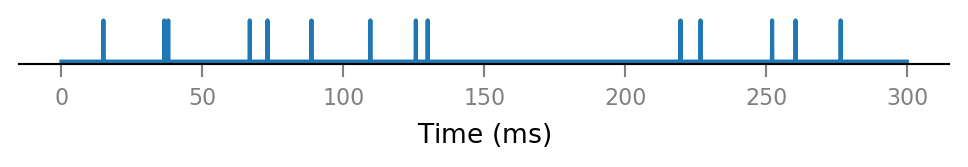

In [2]:
fix_rng_seed(55)

tg = v.TimeGrid(length=300*ms, dt=0.1*ms)

spikes = v.generate_Poisson_spike_train(tg, f_spike=30*Hz)

v.plot(spikes);

## Synaptic conductance

See [here](https://github.com/tfiers/voltage-to-wiring-sim/blob/344468beaf/code/voltage_to_wiring_sim/synapses.py) for the source code that calculates the synaptic conductance.

In brief:
- `g_syn` decays exponentially, with time constant `τ_syn`.
- At every spike, `g_syn` is increased by `Δg_syn`.

This is e.g. how it is done in [this Brian implementation of a Hodgkin-Huxley network](https://brian2.readthedocs.io/en/stable/examples/COBAHH.html).

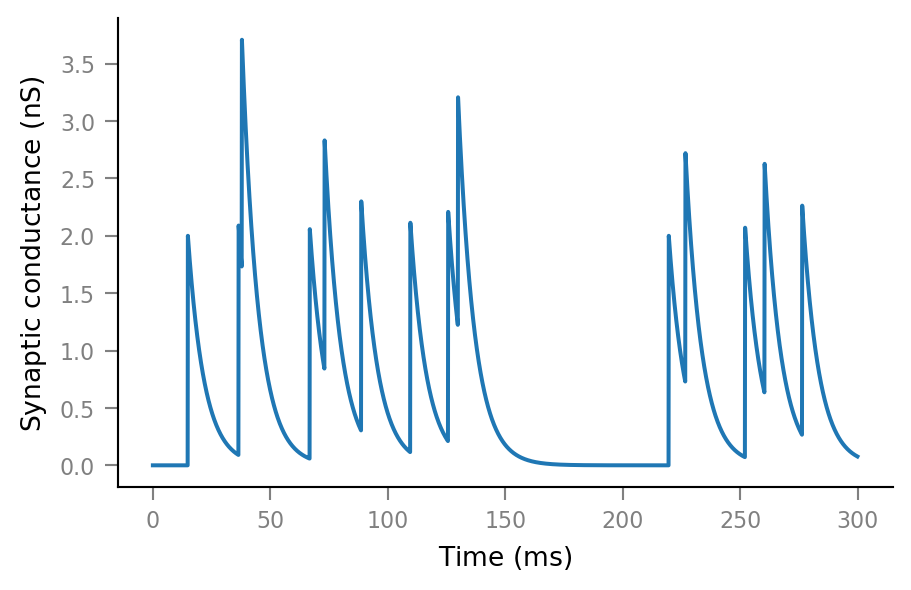

In [3]:
Δg_syn = 2 * nS
τ_syn = 7 * ms

g_syn = v.calc_synaptic_conductance(spikes, Δg_syn, τ_syn)

v.plot(g_syn);

## Neuron simulation

In [7]:
RS = v.params.cortical_RS
print(RS)

IzhikevichParams
----------------
C = 100 pF
k = 0.7 nS/mV
v_r = -60 mV
v_t = -40 mV
v_peak = 35 mV
a = 0.03 1/ms
b = -2 nS
c = -50 mV
d = 100 pA
v_syn = 0 mV


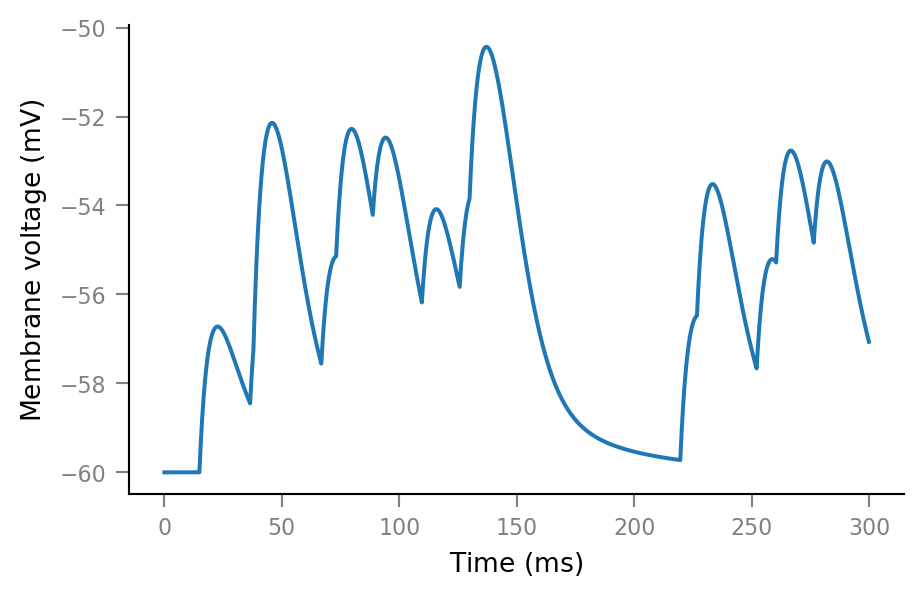

In [8]:
f = partial(v.simulate_izh_neuron, tg, RS)
sim = f(g_syn)
v.plot(sim.V_m);

With twice as much synaptic conductance, we get spikes:

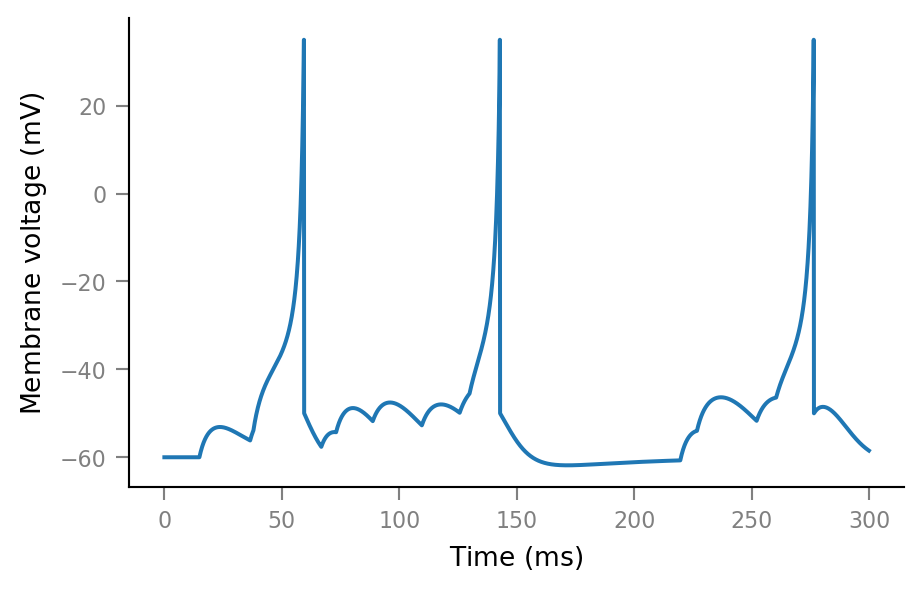

In [9]:
sim = f(2 * g_syn)

v.plot(sim.V_m);

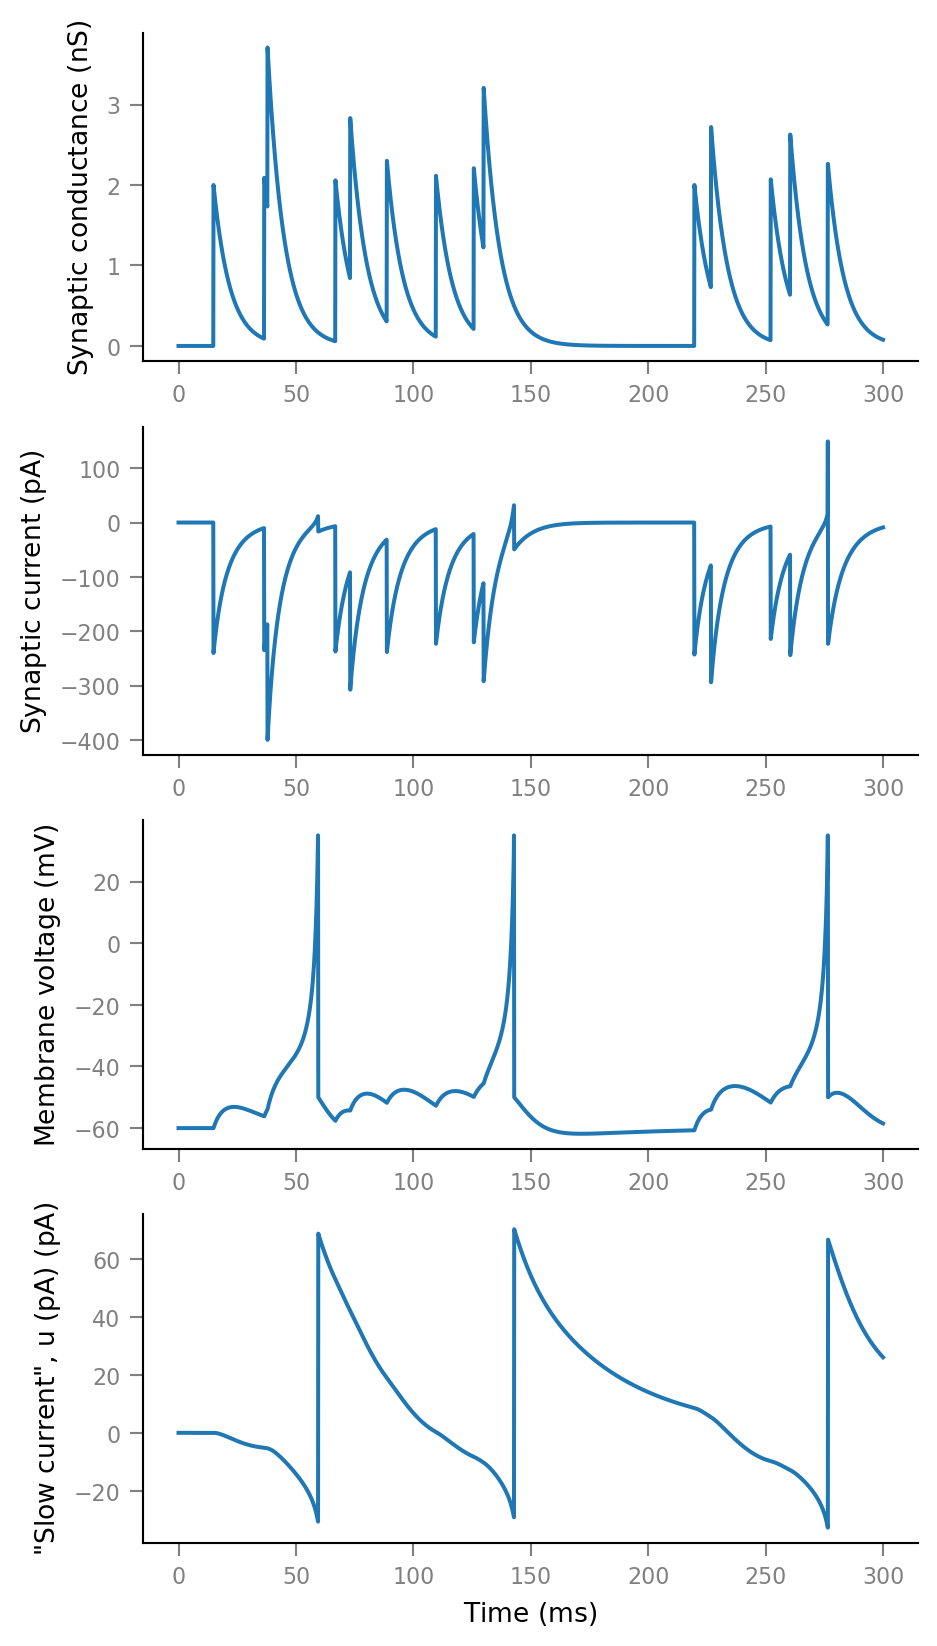

In [10]:
fig, axes = plt.subplots(nrows=4, **v.figsize(aspect=2))

signals = g_syn, sim.I_syn, sim.V_m, sim.u

for i, (ax, sig) in enumerate(zip(axes, signals)):
    v.plot(sig, ax)
    if i < 3:
        ax.set_xlabel(None)

Note that membrane currents, such as the synaptic current, are defined by convention as positive outward (ch 5 of Dayan-Abott). Here synaptic current flows into the neuron, hence the negative sign.

Note also the brief periods where the synaptic current is positive, whenever the membrane potential is higher than the synaptic reversal potential `v_syn`.